In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.lines as mlines

In [143]:
url = 'https://raw.githubusercontent.com/TonyBMB/Python_course/refs/heads/main/Exercise%2034.csv'
df = pd.read_csv(url)
df.head()

,Gene Name,Control_1,Control_2,Control_3,KO_1,KO_2,KO_3
0,rpoC,32144000.0,27876000.0,16709000.0,25664000.0,27452000.0,21104000.0
1,gdhZ,30783000.0,27132000.0,16343000.0,19289000.0,21274000.0,17230000.0
2,rpoB,32908000.0,29162000.0,16587000.0,26168000.0,27069000.0,20876000.0
3,putA,41257000.0,36150000.0,24990000.0,24859000.0,27692000.0,23306000.0
4,gltB,4974600.0,4334200.0,3135400.0,2797400.0,2852700.0,2198300.0


In [144]:
numeric_columns = ['Control_1', 'Control_2', 'Control_3', 'KO_1', 'KO_2','KO_3']

In [161]:
# STEP 4: Apply log transformation to the numeric columns of the main DataFrame
# Using np.log which computes log(x)

# Create a copy to avoid modifying the original DataFrame directly if needed later
log_transformed_df = df[numeric_columns].copy()
log_transformed_df = np.log(log_transformed_df)

print("Original Numeric Data (first 5 rows):")
display(df[numeric_columns].head())

print("\nLog-Transformed Numeric Data (first 5 rows):")
display(log_transformed_df.head())

Original Numeric Data (first 5 rows):


/usr/local/lib/python3.12/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


,Control_1,Control_2,Control_3,KO_1,KO_2,KO_3
0,32144000.0,27876000.0,16709000.0,25664000.0,27452000.0,21104000.0
1,30783000.0,27132000.0,16343000.0,19289000.0,21274000.0,17230000.0
2,32908000.0,29162000.0,16587000.0,26168000.0,27069000.0,20876000.0
3,41257000.0,36150000.0,24990000.0,24859000.0,27692000.0,23306000.0
4,4974600.0,4334200.0,3135400.0,2797400.0,2852700.0,2198300.0



Log-Transformed Numeric Data (first 5 rows):


,Control_1,Control_2,Control_3,KO_1,KO_2,KO_3
0,17.285736,17.143277,16.631458,17.060600,17.127950,16.864973
1,17.242473,17.116224,16.609310,16.775046,16.872996,16.662163
2,17.309226,17.188377,16.624130,17.080048,17.113900,16.854111
3,17.535331,17.403188,17.033986,17.028730,17.136654,16.964221
4,15.419856,15.282048,14.958267,14.844201,14.863776,14.603195


In [168]:
# STEP 5: Transpose the data (rows = samples, columns = genes) using log-transformed data
transposed_data = log_transformed_df.T
transposed_data.columns = df['Gene Name'].loc[log_transformed_df.index]  # Set gene names as column headers, aligned with filtered data

In [178]:
# STEP 6: Create labels
labels = ['Control'] * 3 + ['KO'] * 3

In [179]:

# STEP 7: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(transposed_data)

In [180]:
# STEP 8: Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

In [181]:
# Sample names corresponding to the transposed rows
sample_names = ['Control_1', 'Control_2', 'Control_3', 'KO_1', 'KO_2','KO_3']

In [182]:
# Define new color map
color_map = {'Control': '#c66248', 'KO': '#acc1b9'}  # green and purple

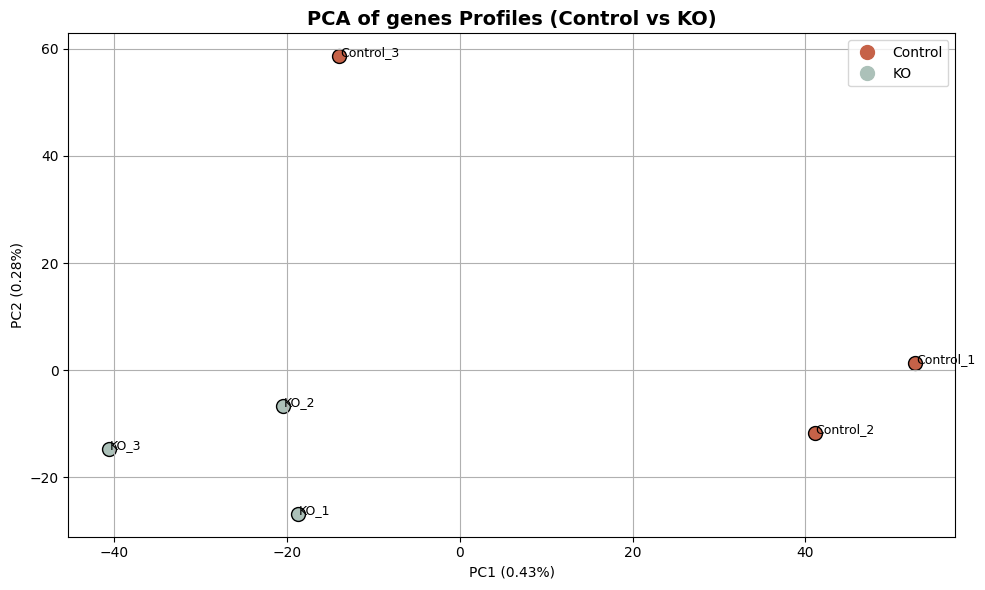

In [183]:
# Plot PCA
plt.figure(figsize=(10, 6))
for i, label in enumerate(labels):
    plt.scatter(
        pca_result[i, 0],
        pca_result[i, 1],
        color=color_map[label],
        s=100,
        edgecolor='black'
    )
    # Add text label
    plt.text(
        pca_result[i, 0] + 0.1,  # slight x offset
        pca_result[i, 1],
        sample_names[i],
        fontsize=9
    )

# Calculate explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Create custom legend handles
legend_handles = [mlines.Line2D([], [], color=color_map[label], marker='o', linestyle='None', markersize=10, label=label) for label in color_map]

plt.xlabel(f'PC1 ({explained_variance[0]:.2f}%)')
plt.ylabel(f'PC2 ({explained_variance[1]:.2f}%)')
plt.title('PCA of genes Profiles (Control vs KO)', fontsize=14, weight='bold')
plt.legend(handles=legend_handles)
plt.grid(True)
plt.tight_layout()
png_path = 'PCA_project_2.png'
pdf_path = 'PCA_Project_2.pdf'
plt.savefig(png_path, dpi=600)
plt.savefig(pdf_path)

plt.show()